In [9]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from statsmodels.tsa.stattools import grangercausalitytests

from graphs import C_SCALE
from read import read_data

In [3]:
data = read_data()
data.index = data['date']
data.drop(['date'], axis=1, inplace=True)
data.head()

,week_day,working,out_of_home,energy,side_projects_time,read_book_time,read_crossword_time,sleep_night_time,sleep_day_time,phone_time,...,macros_fat,macros_alcohol,macros_kcal,published_medium,published_linkedin,sleep_total_time,read_total_time,exercise_total_time,exercise_shoulder_raises_volume,macros_kcal_7sma
date,,,,,,,,,,,,,,,,,,,,,
2024-10-01,1,True,False,3,15,0,20,420,0,212,...,71.0,0.0,1826,0,0,420,20,150,0.0,0.0
2024-10-02,2,True,False,1,60,0,15,360,0,319,...,138.0,0.0,3180,0,0,360,15,20,0.0,0.0
2024-10-03,3,True,False,3,60,0,15,450,0,191,...,118.0,0.0,2783,0,0,450,15,90,0.0,0.0
2024-10-04,4,True,False,1,30,0,25,300,180,270,...,75.0,0.0,2146,0,0,480,25,60,0.0,0.0
2024-10-05,5,False,True,3,120,0,10,360,0,64,...,95.0,14.0,2362,0,0,360,10,0,0.0,2459.4


In [18]:
col_signals = ['working', 'out_of_home', 'energy', 'side_projects_time',
                'read_book_time', 'read_crossword_time', 'sleep_night_time', 'sleep_day_time', 'phone_time', 'tv_time',
                'exercise_volleyball_time', 'exercise_gym_time', 'exercise_home_time', 'exercise_swim_time', 'exercise_run_time', 'exercise_dance_time',
                'macros_protein', 'macros_carbs', 'macros_fat', 'macros_alcohol',
                'published_medium', 'published_linkedin', 'exercise_shoulder_raises_volume']

lab_signals = ['Working', 'Out of home', 'Energy', 'Side projects',
    'Read (book)', 'Read (crossword)', 'Sleep (night)', 'Sleep (day)', 'Phone', 'TV',
    'Exercise (volleyball)', 'Exercise (gym)', 'Exercise (home)', 'Exercise (swim)', 'Exercise (run)', 'Exercise (dance)',
    'Macros (protein)', 'Macros (carbs)', 'Macros (fat)', 'Macros (alcohol)',
    'Medium publications', 'LinkedIn posts', 'Shoulder raises (volume)']

col_forecasts = col_signals[2:]
lab_forecasts = lab_signals[2:]

In [35]:
max_lags = 1
caus_f = pd.DataFrame(np.zeros((len(col_signals), len(col_forecasts))), index=col_signals, columns=col_forecasts)
caus_p = pd.DataFrame(np.zeros((len(col_signals), len(col_forecasts))), index=col_signals, columns=col_forecasts)
for signal, forecast in itertools.product(col_signals, col_forecasts):
    result = grangercausalitytests(data[[forecast, signal]], max_lags)
    f_statictic, p_value = result[max_lags][0]['ssr_ftest'][:2]
    caus_f.loc[signal, forecast] = f_statictic
    caus_p.loc[signal, forecast] = p_value
caus = caus_f.mask(caus_p >= 0.05)
caus


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0231  , p=0.8795  , df_denom=178, df_num=1
ssr based chi2 test:   chi2=0.0234  , p=0.8783  , df=1
likelihood ratio test: chi2=0.0234  , p=0.8783  , df=1
parameter F test:         F=0.0231  , p=0.8795  , df_denom=178, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2414  , p=0.6238  , df_denom=178, df_num=1
ssr based chi2 test:   chi2=0.2455  , p=0.6203  , df=1
likelihood ratio test: chi2=0.2453  , p=0.6204  , df=1
parameter F test:         F=0.2414  , p=0.6238  , df_denom=178, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0273  , p=0.8690  , df_denom=178, df_num=1
ssr based chi2 test:   chi2=0.0277  , p=0.8677  , df=1
likelihood ratio test: chi2=0.0277  , p=0.8677  , df=1
parameter F test:         F=0.0273  , p=0.8690  , df_denom=178, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2049  , p=0.2738  

,energy,side_projects_time,read_book_time,read_crossword_time,sleep_night_time,sleep_day_time,phone_time,tv_time,exercise_volleyball_time,exercise_gym_time,...,exercise_swim_time,exercise_run_time,exercise_dance_time,macros_protein,macros_carbs,macros_fat,macros_alcohol,published_medium,published_linkedin,exercise_shoulder_raises_volume
working,NaN,NaN,NaN,NaN,15.951379,NaN,NaN,NaN,14.764044,19.028211,...,NaN,NaN,7.791829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
out_of_home,NaN,NaN,NaN,NaN,4.678614,NaN,NaN,NaN,NaN,7.071673,...,NaN,11.377829,4.939697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
side_projects_time,NaN,NaN,NaN,NaN,8.914690,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
read_book_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.539715
read_crossword_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.114875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleep_night_time,NaN,NaN,NaN,NaN,NaN,NaN,12.151244,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleep_day_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.978818,NaN,4.206379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tv_time,NaN,NaN,4.980690,NaN,5.372586,NaN,NaN,NaN,5.729040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.339698,12.061625


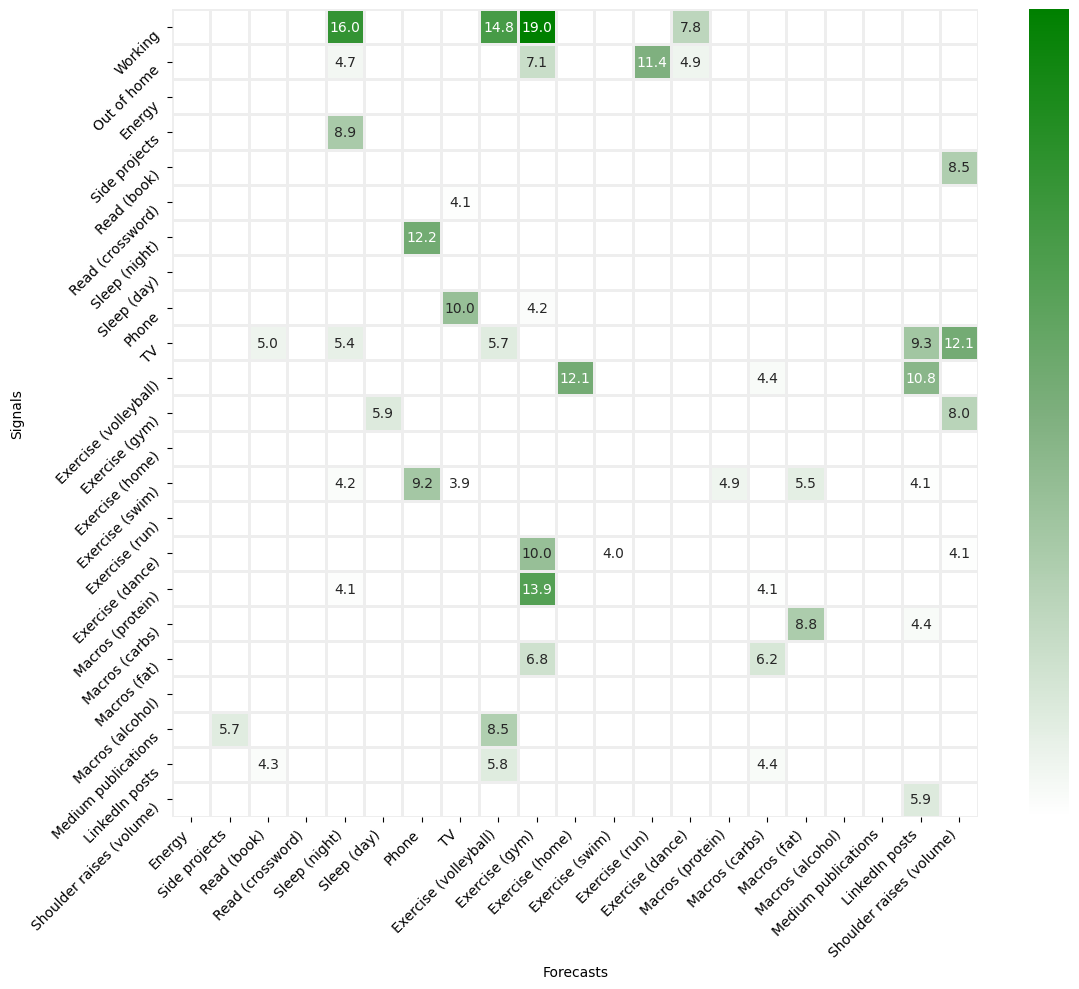

In [36]:
fig, ax = plt.subplots(figsize=(12, 10))
cmap = mcolors.LinearSegmentedColormap.from_list("smooth_cmap", ['white', C_SCALE[-1], 'green'])
sns.heatmap(caus, ax=ax,
            annot=True, fmt=".1f",
            cmap=cmap, cbar=True, cbar_kws={'ticks': []},
            linewidths=1, linecolor='#eee')
ax.set_ylabel('Signals')
ax.set_xlabel('Forecasts')
ax.set_yticklabels(lab_signals, rotation=45, va='top')
ax.set_xticklabels(lab_forecasts, rotation=45, ha='right')
fig.tight_layout()
plt.show()